# Test cases for wave problems (2D)

In [1]:
include("../BEM_base.jl");
using Plots, SpecialFunctions;
pyplot();

### Wave problems

In this notebook, "wave problems" will be solved. This problems correspond to solutions of the Helmholtz equation

\begin{equation}
    \nabla^2 \phi + k^2 \phi = Q + \phi_{inc}
\end{equation}
where $\phi$ is the velocity potential such that $\nabla \cdot \phi = i \omega \rho p$, $p$ is the acoustic pressure, $\rho$ is the density, $k=\omega / c$ is the wave number for frequency $\omega$ , speed of propagation $c$, acoustic sources $Q$ and incident waves $\phi_{inc}$. $\nabla = \left( \frac{\partial}{\partial x}, \frac{\partial}{\partial y},\frac{\partial}{\partial z} \right)$ is the gradient operator and $\nabla^2 = \left( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2} \right)$ is the Laplace operator.

### Interior problems

This examples uses BEM_base to solve the Helmholtz and Laplace equations in bidimensional space using polynomial shape functions and NURBS curves to describe the boundary and interpolate domain variables (velocity potential and its flux for the Helmholtz equation and temperature and its flux for the Laplace equation). The first example which will be solved is acoustic duct problem, which has an analytical solution. If both ends of the acoustic duct are closed, then a Neumann boundary condition ($q = \bar{q}$) is applied. Let the boundary condition of the wall in one of the extremities not be null and that extremity will act as a piston. The analytical resonance frequencies for such ducts are given by


\begin{equation}
    \omega_{closed}\ (n,L) = \frac{n\ \pi\ c}{L}
\end{equation}

with $n=0,1,2,3,...$. Incidentally, this are the same frequencies for a completely open cavity, or a cavity with Dirichlet boundary conditions ($p = \bar{p}$).

A closed-open (like a cup) cavity is
\begin{equation}
    \omega_{cup}\ (m,L) = \frac{(2\ m\ -1)\pi\ c}{2\ L}
\end{equation}
with $m=1,2,3,...$ describes the ressonance angular frequency $\omega$ for a closed, completely open and a open-closed. 



In [2]:
#################### Test case 1-4 ####################
### Acoustic tube
# Consider a square acoustic domain in which the speed of
#sound is approximately 344 [m/s] inside the domain and
#there are two opposite walls which are rigid and two
#open-ended, such that one of them is excited at a frequency
# ω [rads], so that the wave number is k = ω/c, with
#relative amplitude P = 1.
### Analytical solution
phi_closed(k,x) = cos.(k.*x);
q_closed(k,x) = -k.*sin.(k.*x);

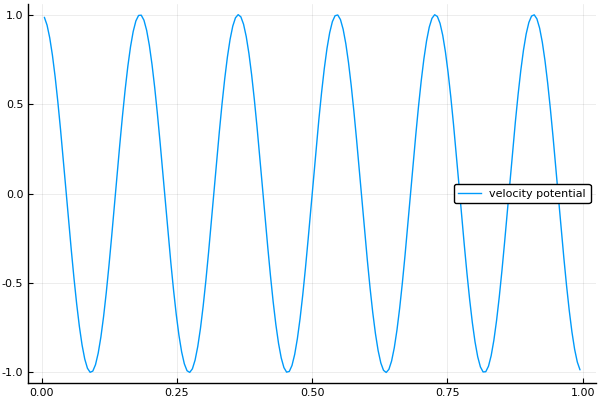

In [3]:
# Domain points
PONTOS_dom1 = [];
L = 1; npdom = 200;
passo = L/(npdom+1);
[append!(PONTOS_dom1,[i*passo L/2] for i=1:npdom)];
PONTOS_dom = zeros(size(PONTOS_dom1,1),2);
[PONTOS_dom[i,:] = PONTOS_dom1[i] for i = 1:size(PONTOS_dom1,1)];
plot(PONTOS_dom[:,1],phi_closed(11*pi,PONTOS_dom[:,1]),label="velocity potential")

In [ ]:
PONTOS_dom;

In [9]:
### BEM model
function closed2D(ne=10,L=1,k=1,PONTOS_dom=[1 L/2 L/2])
    ne=10;L=1;k=1
    #L = 1; # length of the square
    #k = 1; # wave number of the problem
    #The points and segments which describe this geometry are
    POINTS = [1 0 0
	      2 L 0
	      3 L L
	      4 0 L];
    SEGMENTS = [1 1 2 0
	        2 2 3 0
	        3 3 4 0
	        4 4 1 0];
    # Each segment will be meshed by ne elements
    #ne = 100;
    MESH = [1 ne
	    2 ne
	    3 ne
	    4 ne];
    PONTOS_dom1 = [];
    passo = 0.5;
    [append!(PONTOS_dom1,[i*passo 0] for i=1:10)];
    PONTOS_dom = zeros(size(PONTOS_dom1,1),3);
    [PONTOS_dom[i,:] = PONTOS_dom1[i] for i = 1:size(PONTOS_dom1,1)];
    fc = [0 0 0]
    BCSeg = [1 1 0
	     2 0 1
	     3 1 0
	     4 1 1];
    NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
    nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
    info = [NOS_GEO,NOS,ELEM,CDC]
    t = @elapsed phi, q, phi_dom, phi_dom = const2D.solve(info,PONTOS_dom,fc,BCSeg,k)
    # Conventional method with approximated influence matrices
    NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
    nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
    #return norm(phi_dom-phi_closed(k,PONTOS_dom[1,2]))
    return phi_dom,phi_closed(k,PONTOS_dom[:,2])
end

closed2D (generic function with 4 methods)

In [ ]:
PONTOS_dom

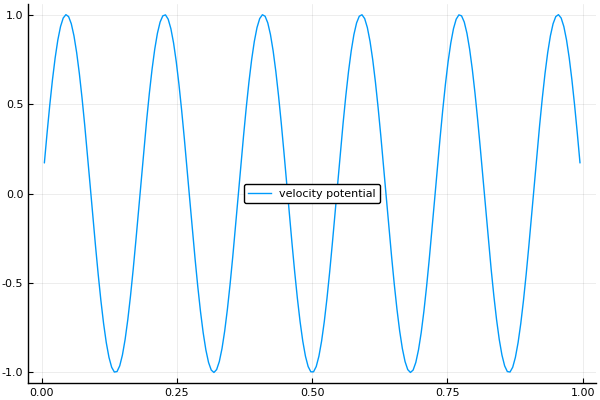

In [26]:
### Analytical solution
phi_open(k,x) = sin.(k.*x)
q_open(k,x) = -k.*cos(k.*x)

plot(PONTOS_dom[:,1],phi_open(11*pi,PONTOS_dom[:,1]),label="velocity potential")

In [7]:
function open2D(ne=10,L=1,k=1)
    #L = 1; # length of the square
    #k = 1; # wave number of the problem
    #The points and segments which describe this geometry are
    POINTS = [1 0 0
	      2 L 0
	      3 L L
	      4 0 L];
    SEGMENTS = [1 1 2 0
	        2 2 3 0
	        3 3 4 0
	        4 4 1 0];
    # Each segment will be meshed by ne elements
    #ne = 100;
    MESH = [1 ne
	    2 ne
	    3 ne
	    4 ne];
    PONTOS_dom = [1 L/2 L/2]
    fc = [0 0 0]
   BCSeg = [1 1 0
	     2 0 0
	     3 1 0
	     4 0 1];
    NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
    nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
    info = [NOS_GEO,NOS,ELEM,CDC]
    t = @elapsed phi, q, phi_dom, phi_dom = const2D.solve(info,PONTOS_dom,fc,BCSeg,k)
    # Conventional method with approximated influence matrices
    NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
    nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
#    info = [NOS_GEO,NOS,ELEM,CDC]
#    tH = @elapsed phiH,qH,phi_domH,phi_domH = const2D.solveH(info,PONTOS_dom,fc,BCSeg,k)    
     return norm(phi_dom-phi_open(k,PONTOS_dom[1,2]))
end

open2D (generic function with 4 methods)

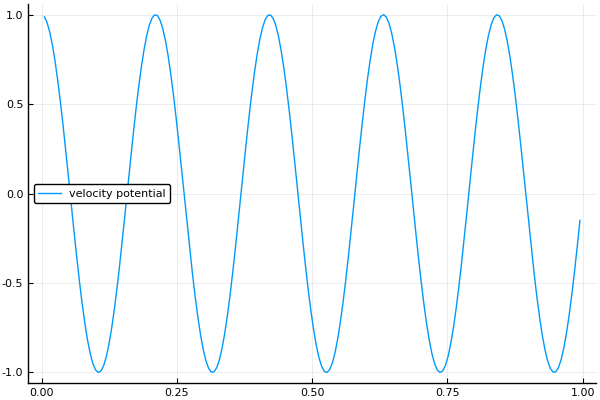

In [27]:
### Analytical solution
phi_cup(k,x) = cos.(k.*x/2)
q_cup(k,x) = -k.*sin(k.*x/2)./2
i=10
plot(PONTOS_dom[:,1],phi_cup((2*i-1)*pi,PONTOS_dom[:,1]),label="velocity potential")

In [9]:
function cup2D(ne=10,L=1,k=1)
    #L = 1; # length of the square
    #k = 1; # wave number of the problem
    #The points and segments which describe this geometry are
    POINTS = [1 0 0
	      2 L 0
	      3 L L
	      4 0 L];
    SEGMENTS = [1 1 2 0
	        2 2 3 0
	        3 3 4 0
	        4 4 1 0];
    # Each segment will be meshed by ne elements
    #ne = 100;
    MESH = [1 ne
	    2 ne
	    3 ne
	    4 ne];
    PONTOS_dom = [1 L/2 L/2]
    fc = [0 0 0]
   BCSeg = [1 1 0
	     2 0 1
	     3 1 0
	     4 1 0];
    NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
    nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
    info = [NOS_GEO,NOS,ELEM,CDC]
    t = @elapsed phi, q, phi_dom, phi_dom = const2D.solve(info,PONTOS_dom,fc,BCSeg,k)
    # Conventional method with approximated influence matrices
    NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
    nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
#    info = [NOS_GEO,NOS,ELEM,CDC]
#    tH = @elapsed phiH,qH,phi_domH,phi_domH = const2D.solveH(info,PONTOS_dom,fc,BCSeg,k)    
    # return norm(phi_dom-phi_cup(k,PONTOS_dom[1,2]))
    return 0
end

cup2D (generic function with 4 methods)

#### Helmholtz resonance

The Helmholtz resonance is obtained by coupling a large volume to a neck which ends at a opening to an unbounded infinite domain. This configuration results in a vibration which resembles a mass-spring system, with the mass of the air on the neck acting like a mass and the compressibility of the volume as a spring. This phenomenom may be observed in many kinds of bottles, which are then called Helmholtz resonators.

The analytical frequency for the Helmholtz resonance in a bottle with neck length $L$, neck cross-section area $S$, volume $V$ and speed of sound $c$:

\begin{equation}
    \omega_{bottle} = c \sqrt{\frac{S}{V L_{eq}}},
\end{equation}
where $L_{eq} = L + 0.6 \sqrt{S/\pi^2}$.

In [10]:
### Analytical solution
function omega_bottle(c=343,V=1,L=0.05,S=L^2)
    Leq = L + 0.6.*sqrt.(S./(pi^2))
    return c.*sqrt.(S./(V.*Leq))
end
omega_bottle()

70.27903773292304

In [11]:
function helmholtz_bottle(ne=10,L=1,k=1)
    #L = 1; # length of the square
    #k = 1; # wave number of the problem
    #The points and segments which describe this geometry are
    POINTS = [1 0 0
	      2 L 0
	      3 L L
	      4 0 L];
    SEGMENTS = [1 1 2 0
	        2 2 3 0
	        3 3 4 0
	        4 4 1 0];
    # Each segment will be meshed by ne elements
    #ne = 100;
    MESH = [1 ne
	    2 ne
	    3 ne
	    4 ne];
    PONTOS_dom = [1 L/2 L/2]
    fc = [0 0 0]
   BCSeg = [1 1 0
	     2 0 0
	     3 1 0
	     4 0 1];
    NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
    nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
    info = [NOS_GEO,NOS,ELEM,CDC]
    t = @elapsed phi, q, phi_dom, phi_dom = const2D.solve(info,PONTOS_dom,fc,BCSeg,k)
    # Conventional method with approximated influence matrices
    NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
    nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
#    info = [NOS_GEO,NOS,ELEM,CDC]
#    tH = @elapsed phiH,qH,phi_domH,phi_domH = const2D.solveH(info,PONTOS_dom,fc,BCSeg,k)    
    #return norm(phi_dom-phi_helmholtz(k,PONTOS_dom[1,2]))
    return 0
end

helmholtz_bottle (generic function with 4 methods)

### Exterior problems

Exterior problems describes wave propagation phenomena which occur in a very large domain, which may be modelled as an infinite medium. 

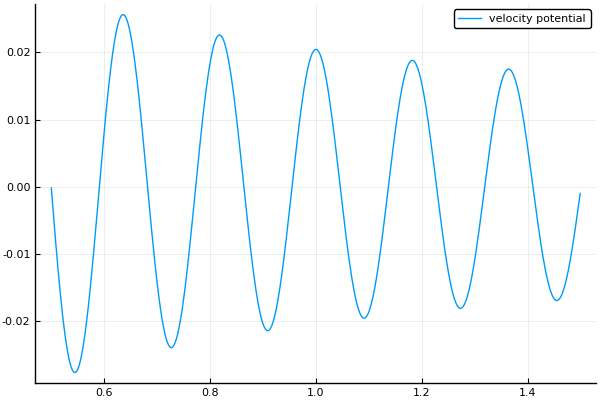

In [24]:
#################### Test case 5 ####################
### Vibrating cylinder
# An acoustically rigid cylinder is let to vibrate in an
#infinite acoustic domain at frequency ω so that the wavenumber is k = ω/c.
### Analytical solution
#The analytical solution for the vibrating cylinder obtained
#by applying variable separation in cylindrical coordinates
#of the Helmholtz equation is
phi_cylinder(k,r,x) = (1/k).*(besselh.(0,2,k.*x)./besselh.(1,2,k.*r));
#at a distance x from the cylinder of radius r.
x = 0.501:0.001:1.499
plot(x,real(phi_cylinder(11*pi,0.5,x)),label="velocity potential")

In [13]:
### BEM models
function const2Dcylinder(ne = 100,r=0.5,c=[0 0],k=1)
    t=0; ϵ=0; phi=0; q=0; phi_dom=0;  
    POINTS =[1  c[1,1]-r	c[1,2]
       	     2	c[1,1]		c[1,2]+r
       	     3	c[1,1]+r	c[1,2]
       	     4	c[1,1]		c[1,2]-r];
    SEGMENTS = [1 1 2 -r
                2 2 3 -r
                3 3 4 -r
                4 4 1 -r];
    BCSeg = [1 1 1 0
             2 1 1 0
             3 1 1 0
             4 1 1 0];
    MESH = [1 ne
            2 ne
            3 ne
            4 ne];
    x = 10*r
    PONTOS_dom = [1 0 x]
    fc = [0 0 0]
    # # Conventional method with full influence matrices
    NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
    nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
    info = [NOS_GEO,NOS,ELEM,CDC]
    t = @elapsed phi, q, phi_dom, phi_dom = const2D.solve(info,PONTOS_dom,fc,BCSeg,k)
    b1 = 1:nnos # Array containing all the indexes for nodes and elements
    npg=6
    qsi,w = const2D.Gauss_Legendre(-1,1,npg) # Generation of the points and weights
    A,b = const2D.cal_Aeb(b1,b1, [NOS,NOS_GEO,ELEM,fc,qsi,w,CDC,k])
    ϵ = abs.(sqrt.(((phi_dom .- phi_cylinder(k,r,x)).^2)./phi_cylinder(k,r,x).^2))
    return ϵ[1]
end

const2Dcylinder (generic function with 5 methods)

In [14]:
function Hconst2Dcylinder(ne = 100,r=0.5,c=[0 0],k=1)
    t=0; tH=0; tiso=0; ϵ=0; ϵH=0; ϵiso=0; phi=0; q=0; phi_dom=0;  phiH=0; qH=0; phi_domH=0;  phiiso=0; qiso=0; domiso=0;
    POINTS =[1  c[1,1]-r	c[1,2]
       	     2	c[1,1]		c[1,2]+r
       	     3	c[1,1]+r	c[1,2]
       	     4	c[1,1]		c[1,2]-r];
    SEGMENTS = [1 1 2 -r
                2 2 3 -r
                3 3 4 -r
                4 4 1 -r];
    BCSeg = [1 1 1 0
             2 1 1 0
             3 1 1 0
             4 1 1 0];
    MESH = [1 ne
            2 ne
            3 ne
            4 ne];
    x = 10*r
    PONTOS_dom = [1 0 x]
    fc = [0 0 0]
    npg=6
    qsi,w = const2D.Gauss_Legendre(-1,1,npg) # Generation of the points and weights
    NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)     
    nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
    # Conventional method with approximated influence matrices
    # tH = @elapsed phiH,qH,phi_domH,phi_domH = const2D.solveH(info,PONTOS_dom,fc,BCSeg,k)
    b1 = 1:nnos # Array containing all the indexes for nodes and elements
    A,b = const2D.cal_Aeb(b1,b1, [NOS,NOS_GEO,ELEM,fc,qsi,w,CDC,k])
    Tree,block = const2D.cluster(NOS[:,2:3],floor(sqrt(length(NOS))),2)
    tH = @elapsed Aaca1,baca =  const2D.Hinterp(Tree,block,[NOS,NOS_GEO,ELEM,fc,qsi,w,CDC,k])
    Aaca = const2D.montacheia(Aaca1,block,Tree,nnos)
    ϵH = norm(Aaca-A)
    println("ϵH = ",ϵH)
    #xaca = Aaca\baca
    #phiH,qphiH,phidomH = const2D.(xaca,CDC)
    #println("A = ",A)
    #println("Aaca = ",Aaca)
    #ϵH = abs.(sqrt.(((phi_domH .- phi_cylinder(1,0.5,5)).^2)./phi_cylinder(1,0.5,5).^2))
    return ϵH[1]
end

Hconst2Dcylinder (generic function with 5 methods)

In [15]:
function nurbs2Dcylinder(ne = 100,r=0.5,c=[0 0],k=1)
    t=0; tH=0; tiso=0; ϵ=0; ϵH=0; ϵiso=0; phi=0; q=0; phi_dom=0;  phiH=0; qH=0; phi_domH=0;  phiiso=0; qiso=0; domiso=0;
    POINTS =[1  c[1,1]-r	c[1,2]
       	     2	c[1,1]		c[1,2]+r
       	     3	c[1,1]+r	c[1,2]
       	     4	c[1,1]		c[1,2]-r];
    SEGMENTS = [1 1 2 -r
                2 2 3 -r
                3 3 4 -r
                4 4 1 -r];
    BCSeg = [1 1 1 0
             2 1 1 0
             3 1 1 0
             4 1 1 0];
    MESH = [1 ne
            2 ne
            3 ne
            4 ne];
    x = 10*r
    PONTOS_dom = [1 0 x]
    fc = [0 0 0]
    # Isogeometric BEM with full influence matrices
    collocCoord,nnos,crv,dcrv,E,CDC = nurbs2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
    info = [collocCoord,nnos,crv,dcrv,E]
    tiso = @elapsed phiiso, qiso, phi_domiso = nurbs2D.solve(info,PONTOS_dom,[0],CDC,k)
    ϵ = abs.(sqrt.(((phi_domiso .- phi_cylinder(1,0.5,5)).^2)./phi_cylinder(1,0.5,5).^2))
    return ϵ[1]
end

nurbs2Dcylinder (generic function with 5 methods)

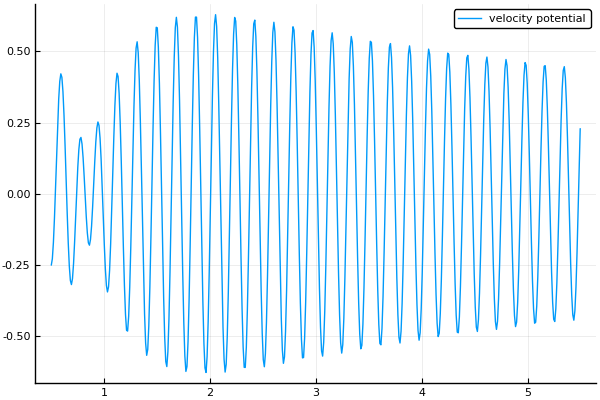

In [68]:
#################### Test case 6 ####################
### Plane wave scattering on a rigid cylinder
# An acoustically rigid cylinder is let to vibrate in an
#infinite acoustic domain at frequency ω so that the wavenumber is k = ω/c.
# The cylinder also scatters a plane wave with direction d = (dx,dy,dz) and
#wavenumber k_inc, amplitude a_inc. 
### Analytical solution
#The analytical solution for the scattering cylinder is
besseljprime(nu,x) = -1/2*(besselj.(nu-1,x) - besselj.(nu+1,x))
besselyprime(nu,x) = -1/2*(bessely.(nu-1,x) - bessely.(nu+1,x))
besselhprime(nu,x) = besseljprime.(nu,x) + complex(0,1)*besselyprime.(nu,x)

function phi_cyl_scat(k,r,θ,a) # cylinder of radius a at a distance r
    phi = -(besselj.(1,k*a)./besselh.(1,k*a))*besselh.(0,k*r)
    for n in 1:1:100
        phi += (complex(0,1)^n).*(besseljprime(n,k*a)./besselhprime(n,k*a)).*besselh.(n,k*r).*cos(n*θ)
    end
    return phi
end
x = 0.501:0.01:5.499
i=11
plot(x,imag(phi_cyl_scat(i*pi,x,0,0.5)),label="velocity potential")

In [17]:
### BEM model
function cyl_scat(ne = 100,r=0.5,c=[0 0],k=1)
    t=0; tH=0; tiso=0; ϵ=0; ϵH=0; ϵiso=0; phi=0; q=0; phi_dom=0;  phiH=0; qH=0; phi_domH=0;  phiiso=0; qiso=0; domiso=0;
    POINTS =[1  c[1,1]-r	c[1,2]
       	     2	c[1,1]		c[1,2]+r
       	     3	c[1,1]+r	c[1,2]
       	     4	c[1,1]		c[1,2]-r];
    SEGMENTS = [1 1 2 -r
                2 2 3 -r
                3 3 4 -r
                4 4 1 -r];
    BCSeg = [1 1 1 0
             2 1 1 0
             3 1 1 0
             4 1 1 0];
    MESH = [1 ne
            2 ne
            3 ne
            4 ne];
    x = 10*r
    PONTOS_dom = [1 0 x]
    fc = [1 -1 0]
    # # Conventional method with full influence matrices
     NOS_GEO,NOS,ELEM,CDC,normal = const2D.format_dad(POINTS,SEGMENTS,MESH,BCSeg)
     nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
     info = [NOS_GEO,NOS,ELEM,CDC]
#    t = @elapsed phi, q, phi_dom, phi_dom = const2D.solve(info,PONTOS_dom,fc,BCSeg,k)
    b1 = 1:nnos # Array containing all the indexes for nodes and elements
    npg=6
    qsi,w = const2D.Gauss_Legendre(-1,1,npg) # Generation of the points and weights
    t = @elapsed A,b = const2D.cal_Aeb(b1,b1, [NOS,NOS_GEO,ELEM,fc,qsi,w,CDC,k])
    ϵ = abs.(sqrt.(((phi_dom .- phi_cyl_scat(k,r,x)).^2)./phi_cyl_scat(k,r,x).^2))
    return ϵ
end

cyl_scat (generic function with 5 methods)